In [4]:
# Portfolio correlation, risk and coherence

# Correlation measures association, the degree to which two variables move in relation to each other.
# Correlation factor r, is between from -1 to 0 to 1, meaning from a negative correlation, to a 
# positive correlation, with no correlation at all being in the middle.
# Correlation factor = the average observations of X / the average observations of Y


import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yfin
yfin.pdr_override()

# To get around a breaking change in the yahoo finance API

tickers = ['NVDA', 'INTC', 'AMD', 'TSM']
start = dt.datetime(2019, 1, 1)
data = pdr.get_data_yahoo(tickers, start)

[*********************100%***********************]  4 of 4 completed


In [5]:
data.head()

Adj Close                                       Close             \
                  AMD       INTC       NVDA        TSM        AMD       INTC   
Date                                                                           
2019-01-02  18.830000  41.513226  33.799728  32.560844  18.830000  47.080002   
2019-01-03  17.049999  39.229469  31.757652  30.635014  17.049999  44.490002   
2019-01-04  19.000000  41.636673  33.792290  31.178881  19.000000  47.220001   
2019-01-07  20.570000  41.830662  35.581264  31.410692  20.570000  47.439999   
2019-01-08  20.750000  42.095192  34.695465  31.152130  20.750000  47.740002   

                                       High             ...        Low  \
                 NVDA        TSM        AMD       INTC  ...       NVDA   
Date                                                    ...              
2019-01-02  34.055000  36.520000  19.000000  47.470001  ...  32.512501   
2019-01-03  31.997499  34.360001  18.680000  46.279999  ...  31.922501   
2019-01-04  34.047501  34.970001  19.070000  47.570000  ...  32.424999   
2019-01-07  35.849998  35.230000  20.680000  48.000000  ...  34.107498   
2019-01-08  34.957500  34.939999  21.200001  48.029999  ...  34.224998   

                            Open                                      Volume  \
                  TSM        AMD       INTC       NVDA        TSM        AMD   
Date                                                                           
2019-01-02  36.000000  18.010000  45.959999  32.660000  36.200001   87148700   
2019-01-03  34.270000  18.420000  46.150002  33.447498  35.340000  117277600   
2019-01-04  34.209999  17.549999  45.840000  32.735001  34.459999  111878600   
2019-01-07  34.970001  19.440001  47.099998  34.625000  35.009998  107157000   
2019-01-08  34.639999  21.190001  47.799999  36.672501  35.110001  121271000   

                                          
                INTC      NVDA       TSM  
Date                                      
2019-01-02  18774600  50875200   5273100  
2019-01-03  32267300  70555200  15998000  
2019-01-04  35447300  58562000  14178200  
2019-01-07  22736800  70916000   6850800  
2019-01-08  22749200  78601600  11462600  

[5 rows x 24 columns]

In [8]:
data = data['Adj Close']

In [9]:
data.head()

,AMD,INTC,NVDA,TSM
Date,,,,
2019-01-02,18.830000,41.513226,33.799728,32.560844
2019-01-03,17.049999,39.229469,31.757652,30.635014
2019-01-04,19.000000,41.636673,33.792290,31.178881
2019-01-07,20.570000,41.830662,35.581264,31.410692
2019-01-08,20.750000,42.095192,34.695465,31.152130


In [10]:
# Normalising the stock prices, because they are on different scales and need to be converted to a 
# comparable basis:

log_returns = np.log(data/data.shift())

In [11]:
log_returns

,AMD,INTC,NVDA,TSM
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.099301,-0.056584,-0.062319,-0.060967
2019-01-04,0.108289,0.059553,0.062099,0.017597
2019-01-07,0.079395,0.004648,0.051587,0.007407
2019-01-08,0.008713,0.006304,-0.025210,-0.008266
...,...,...,...,...
2023-04-24,-0.009773,-0.021348,-0.002843,-0.008588
2023-04-25,-0.044005,-0.026650,-0.030068,-0.028157
2023-04-26,0.025216,0.005869,0.026883,-0.000486


In [12]:
log_returns.corr()
# When AMD is compared to AMD, is has a correlation of 1.


,AMD,INTC,NVDA,TSM
AMD,1.000000,0.516657,0.780423,0.615678
INTC,0.516657,1.000000,0.610178,0.547970
NVDA,0.780423,0.610178,1.000000,0.666675
TSM,0.615678,0.547970,0.666675,1.000000


In [13]:
# Comparing the correlation of the chip portfolio to the S&P500 index
sp500 = pdr.get_data_yahoo("^GSPC", start)

[*********************100%***********************]  1 of 1 completed


In [15]:
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000


In [17]:
log_returns['SP500'] = np.log(sp500['Adj Close']/sp500['Adj Close'].shift())

In [18]:
log_returns

# When a stock is a large capitalisation of the S&P500, it will have a high correlation. 
# The stocks in this chip portfolio have smaller market capitalisations.

,AMD,INTC,NVDA,TSM,SP500
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.099301,-0.056584,-0.062319,-0.060967,-0.025068
2019-01-04,0.108289,0.059553,0.062099,0.017597,0.033759
2019-01-07,0.079395,0.004648,0.051587,0.007407,0.006986
2019-01-08,0.008713,0.006304,-0.025210,-0.008266,0.009649
...,...,...,...,...,...
2023-04-24,-0.009773,-0.021348,-0.002843,-0.008588,0.000851
2023-04-25,-0.044005,-0.026650,-0.030068,-0.028157,-0.015937
2023-04-26,0.025216,0.005869,0.026883,-0.000486,-0.003849


In [19]:
# Finding a ticker with a negative correlation

def test_correlation(ticker):
    df = pdr.get_data_yahoo(ticker, start)
    lr = log_returns.copy()
    lr[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift())
    return lr.corr()

In [20]:
test_correlation("LQD")

[*********************100%***********************]  1 of 1 completed


,AMD,INTC,NVDA,TSM,SP500,LQD
AMD,1.000000,0.516657,0.780423,0.615678,0.649274,0.255748
INTC,0.516657,1.000000,0.610178,0.547970,0.695087,0.257894
NVDA,0.780423,0.610178,1.000000,0.666675,0.736256,0.281189
TSM,0.615678,0.547970,0.666675,1.000000,0.641660,0.227445
SP500,0.649274,0.695087,0.736256,0.641660,1.000000,0.332855
LQD,0.255748,0.257894,0.281189,0.227445,0.332855,1.000000


In [22]:
test_correlation("TLT")
# Testing the correlation of a Twenty Year Treasury Bond ETF
# It has a negative correlation

[*********************100%***********************]  1 of 1 completed


,AMD,INTC,NVDA,TSM,SP500,TLT
AMD,1.000000,0.516657,0.780423,0.615678,0.649274,-0.070977
INTC,0.516657,1.000000,0.610178,0.547970,0.695087,-0.183461
NVDA,0.780423,0.610178,1.000000,0.666675,0.736256,-0.082551
TSM,0.615678,0.547970,0.666675,1.000000,0.641660,-0.136130
SP500,0.649274,0.695087,0.736256,0.641660,1.000000,-0.240693
TLT,-0.070977,-0.183461,-0.082551,-0.136130,-0.240693,1.000000


In [23]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [30]:
# Visualising the negative correlation

def visualise_correlation(ticker1, ticker2):
    df = pdr.get_data_yahoo([ticker1, ticker2], start)
    df = df['Adj Close']
    # Normalising the data
    df = df/df.iloc[0]
    # Creating a subplot
    fig, ax = plt.subplots()
    df.plot(ax=ax)

[*********************100%***********************]  2 of 2 completed


<IPython.core.display.Javascript object>


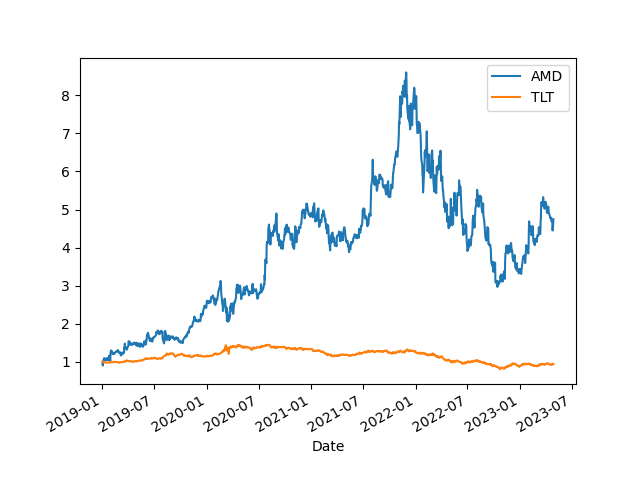

In [31]:
visualise_correlation("AMD", "TLT")

[*********************100%***********************]  2 of 2 completed


<IPython.core.display.Javascript object>


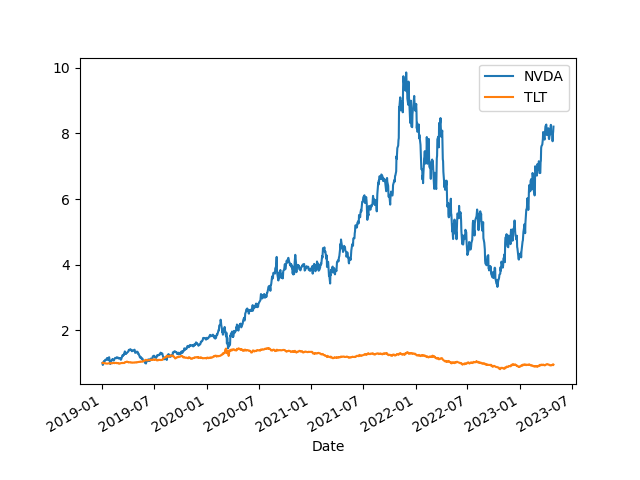

In [32]:
visualise_correlation("NVDA", "TLT")

[*********************100%***********************]  2 of 2 completed


<IPython.core.display.Javascript object>


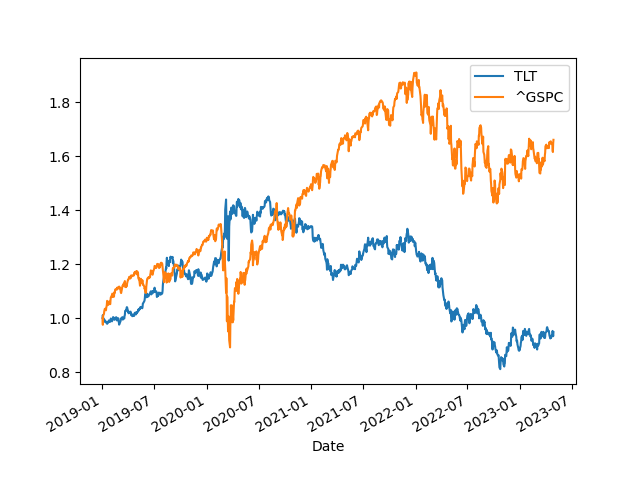

In [35]:
visualise_correlation("^GSPC", "TLT")

# This subplot visualises the correlation between the S&P500 and Twent Year Treasury Bonds

In [36]:
# If all the stocks in the portfolio are highly correlated, they may be exposed to the same risk.
# Diversfying, and reducing the positive correlation may reduce risk exposure.